In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import cvxpy as cvx
import time
import itertools

from matplotlib import mlab
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
import time
import os
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier

from util import *
from module_decov import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
input_folder='./10x_data'
output_folder='./10x_exp_2'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

**Data loading**

In [3]:
(X,X_label,gene_name)=np.load(input_folder+'/top_50_mean.npy')
# for i in range(X.shape[1]):
#     plot_gene(np.log(X[:,i]+1),gene_name[i],X_label)

In [4]:
for i in range(X.shape[1]):
    print i,gene_name[i],np.mean(X[:,i])

0 ['CAAA01147332.1'] 90.8269188218
1 ['Vmn2r122'] 53.3379265569
2 ['DHRSX'] 50.5020537819
3 ['PISD'] 37.7859725739
4 ['AC168977.1'] 37.475515015
5 ['AC168977.2'] 30.9628359264
6 ['AC234645.1'] 30.6645050596
7 ['AC125149.4'] 30.0185701697
8 ['AC125149.2'] 23.1638033667
9 ['AC125149.1'] 23.1260344515
10 ['AC125149.5'] 21.4599108662
11 ['AC125149.3'] 20.6062121065
12 ['AC102264.1'] 20.6002969083
13 ['Vmn1r186'] 20.4217055462
14 ['AC125178.2'] 20.1862429917
15 ['AC125178.3'] 19.7014899776
16 ['AC125178.1'] 19.3810142505
17 ['CT868723.1'] 18.8280687866
18 ['Gm10931'] 17.498339748
19 ['Ccl21a'] 17.3560427125
20 ['Ccl19'] 16.8224766811
21 ['Il11ra2'] 16.7835440198
22 ['Ccl27a'] 16.7221564212
23 ['AC140325.4'] 15.7892050314
24 ['AC140325.3'] 15.6062902
25 ['Gm3286'] 15.5890085727
26 ['AC140325.1'] 15.5305594326
27 ['AC140325.2'] 15.4417564295
28 ['AC164084.1'] 15.1833091269
29 ['AC164084.3'] 15.1218840128
30 ['AC164084.2'] 14.9826808572
31 ['AC165294.3'] 14.7124131114
32 ['AC165294.2'] 14.6470

** Estimation 1d **

In [ ]:
O

** Estimation 2d **

proportion of remaining cells: 1267264/1306127=0.970
------ hist_2d start
0.0
0 50
0.378391981125
1.21863603592
1.42153596878
1.42250609398
------ hist_2d end


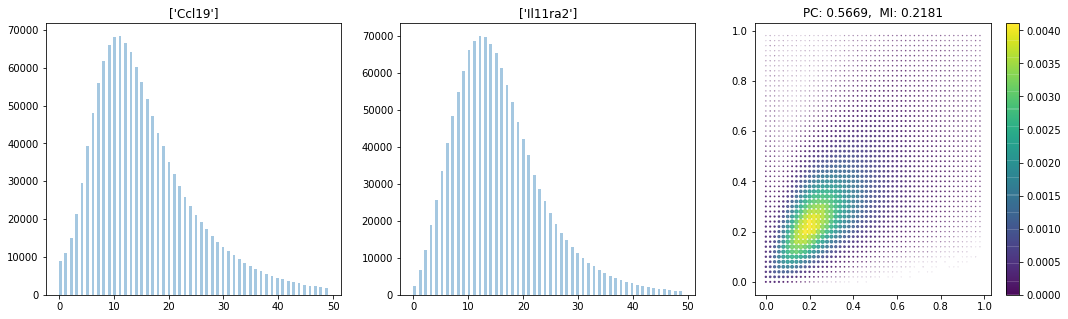

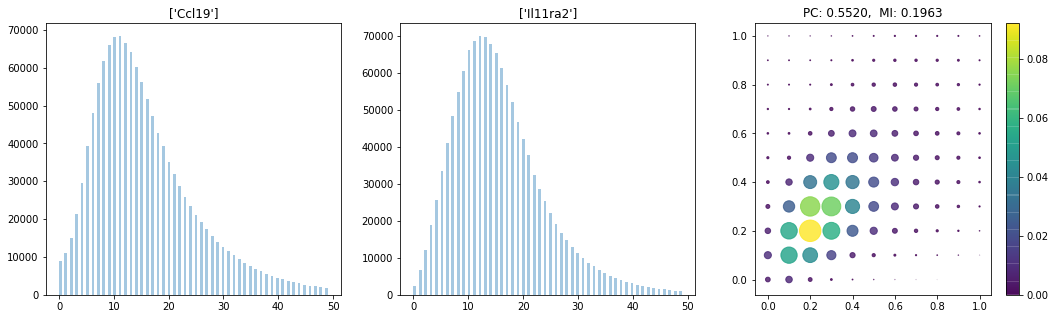

In [4]:
## the 2d problem instance
gene_pair=[20,21]
Y=X[:,gene_pair]
Y_max=50
Y=Y[(Y[:,0]<Y_max)*(Y[:,1]<Y_max)]
print 'proportion of remaining cells: %s/%s=%s'%(str(Y.shape[0]),str(X.shape[0]),str(Y.shape[0]/(X.shape[0]+0.0))[0:5])
p,x=hist_2d(Y)
x=x/(Y_max+0.0)
plt.figure(figsize=[18,5])
plt.subplot(131)
plt.title(gene_name[gene_pair[0]])
plot_hist(Y[:,0])
plt.subplot(132)
plt.title(gene_name[gene_pair[1]])
plot_hist(Y[:,1])
plt.subplot(133)
plot_density_2d(p,x)
plt.show()

## quantization 
p,x = quantize(p,x)
plt.figure(figsize=[18,5])
plt.subplot(131)
plt.title(gene_name[gene_pair[0]])
plot_hist(Y[:,0])
plt.subplot(132)
plt.title(gene_name[gene_pair[1]])
plot_hist(Y[:,1])
plt.subplot(133)
plot_density_2d(p,x)
plt.show()

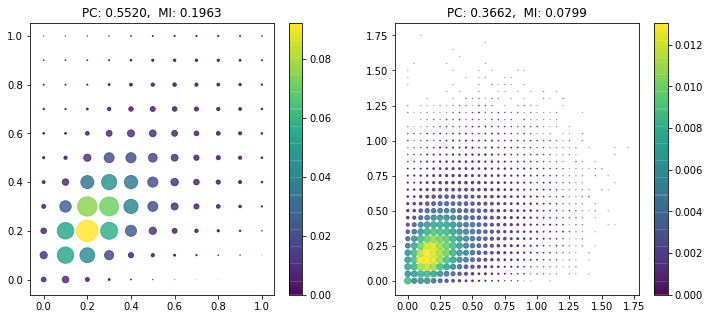

In [53]:
## generating he similated data 
np.random.seed(42)
N_c=100000
N_r=20
Y_pdf,Y_supp=data_gen_poi_2d(p,x,N_c,N_r)

plt.figure(figsize=[12,5])
plt.subplot(1,2,1)
plot_density_2d(p,x)
plt.subplot(1,2,2)
plot_density_2d(Y_pdf,Y_supp/(N_r+0.0))
plt.show()

------ dd_2d start, option:dd, lambda:0.1
------ model cal completed: 0.0961451530457
------ optimization start: 0.87461400032
------ optimization end: 7.46227121353
KL:-0.005, TV:0.0235, continuity: 0.0058
------ dd_2d end: 7.53331804276


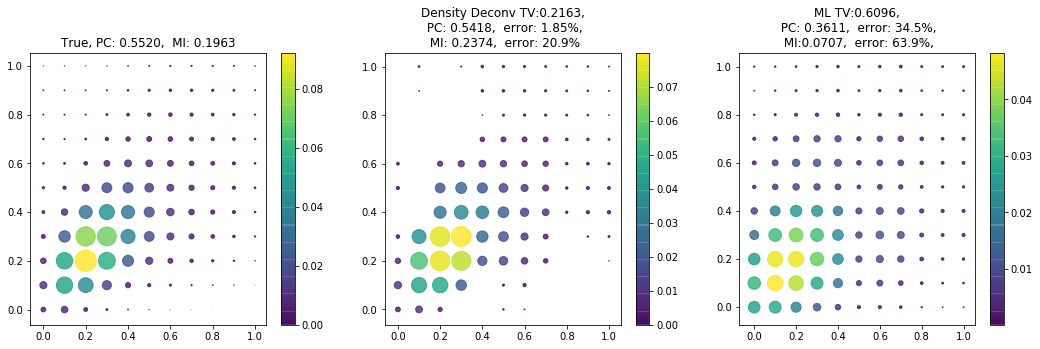

------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.105057954788
------ optimization start: 0.669328927994
------ optimization end: 9.44359493256
KL:-0.004, TV:0.0235, continuity: 0.0055
------ dd_2d end: 9.4578499794


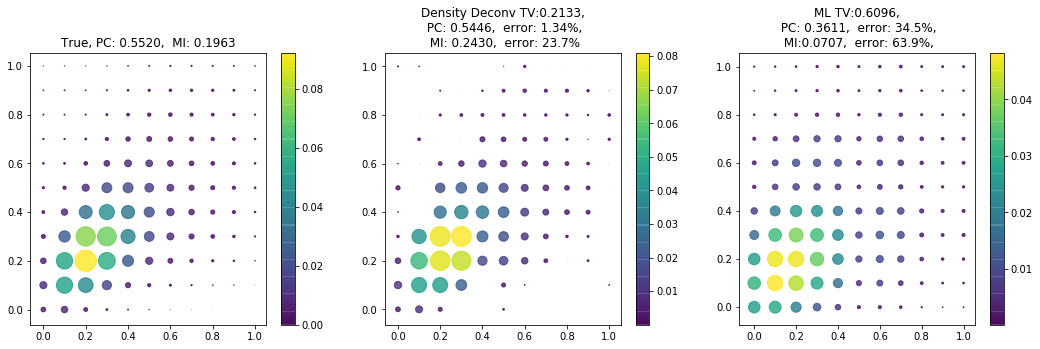

In [63]:
p_hat, dd_info=dd_2d(Y_pdf,Y_supp,x,N_c,N_r,option='dd')
_=plot_dd_result(p,p_hat,dd_info)

p_hat, dd_info=dd_2d(Y_pdf,Y_supp,x,N_c,N_r,option='mml')
_=plot_dd_result(p,p_hat,dd_info)

--------------------- lambda: 0.0 ---------------------
------ dd_2d start, option:dd, lambda:0.0
------ model cal completed: 0.060534954071
------ optimization start: 0.543820142746
------ optimization end: 4.0415661335
KL:-0.004, TV:0.0223, continuity: 0.1034
------ dd_2d end: 4.04781293869


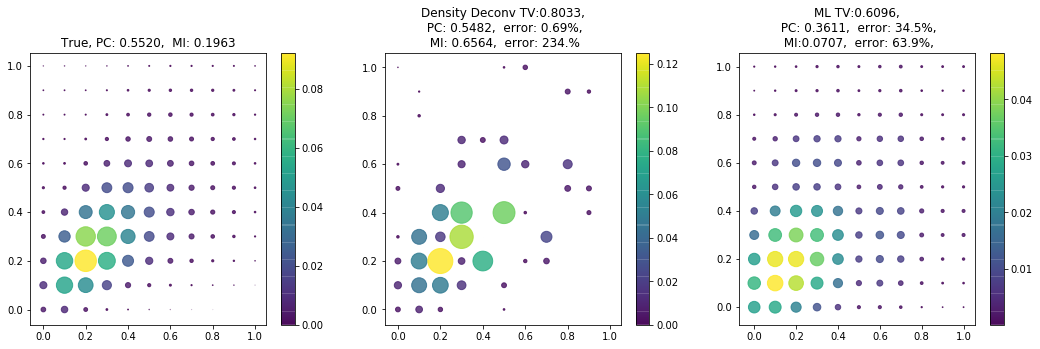

------ dd_2d start, option:mml, lambda:0.0
------ model cal completed: 0.0620501041412
------ optimization start: 0.576694011688
------ optimization end: 7.62658905983
KL:-0.004, TV:0.0224, continuity: 0.0399
------ dd_2d end: 7.63352894783


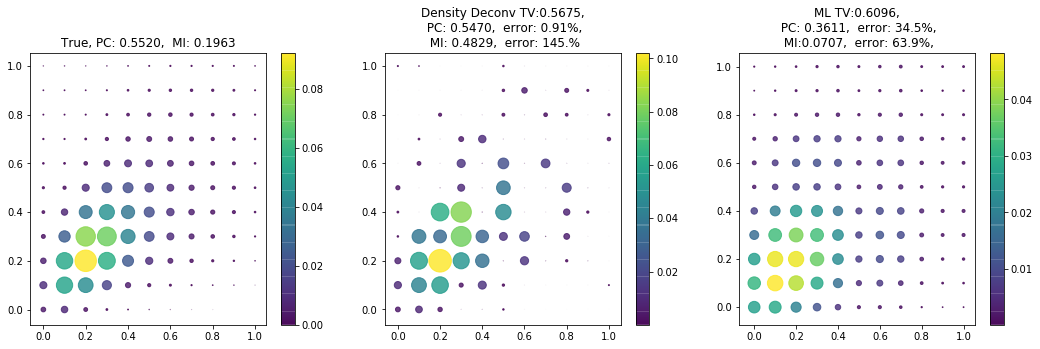

--------------------- lambda: 0.1 ---------------------
------ dd_2d start, option:dd, lambda:0.1
------ model cal completed: 0.0636110305786
------ optimization start: 0.53075504303
------ optimization end: 3.84508705139
KL:-0.005, TV:0.0235, continuity: 0.0058
------ dd_2d end: 3.85117697716


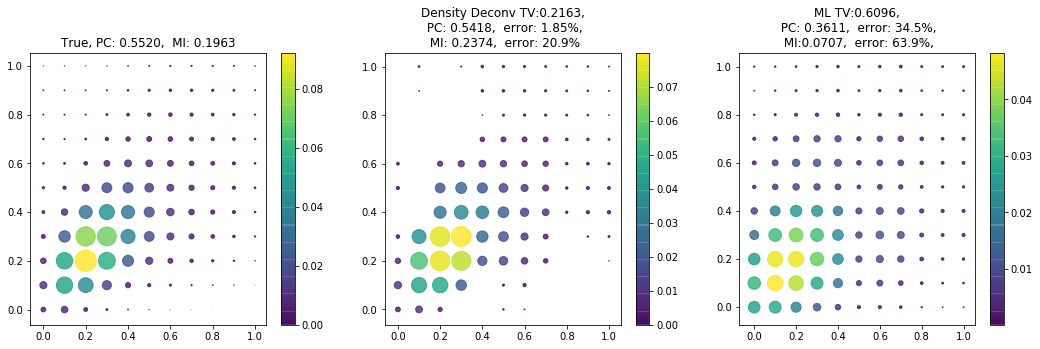

------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0593049526215
------ optimization start: 0.518036842346
------ optimization end: 8.07328701019
KL:-0.004, TV:0.0235, continuity: 0.0055
------ dd_2d end: 8.08048987389


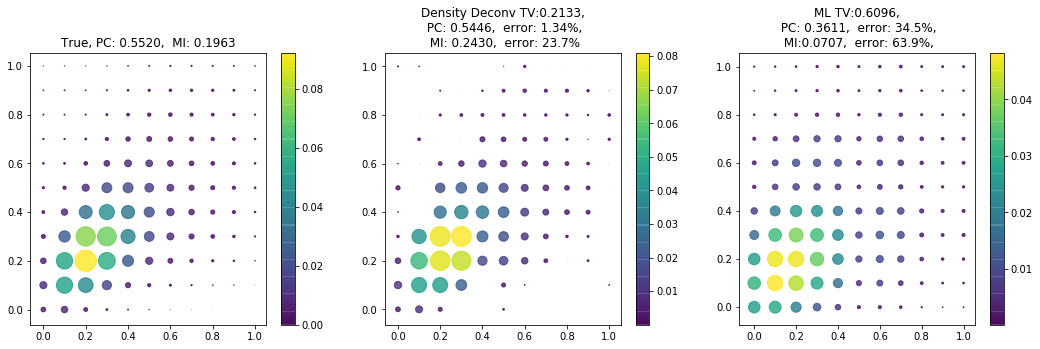

--------------------- lambda: 0.2 ---------------------
------ dd_2d start, option:dd, lambda:0.2
------ model cal completed: 0.0631620883942
------ optimization start: 0.525844097137
------ optimization end: 3.55863714218
KL:-0.005, TV:0.0240, continuity: 0.0051
------ dd_2d end: 3.56472992897


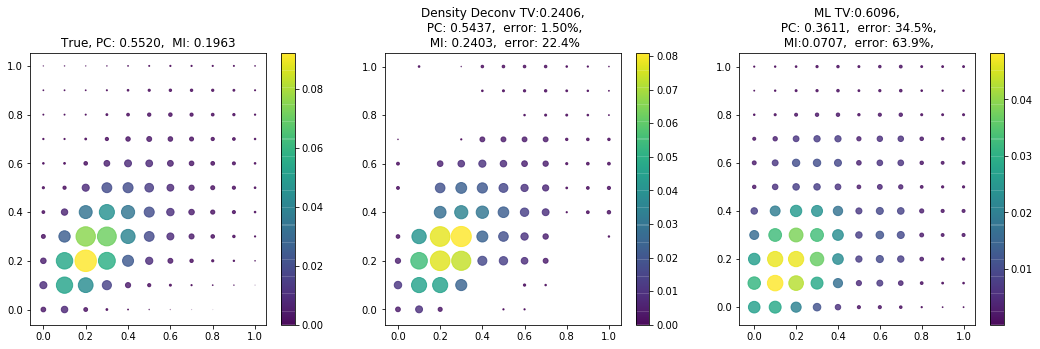

------ dd_2d start, option:mml, lambda:0.2
------ model cal completed: 0.0620579719543
------ optimization start: 0.522692918777
------ optimization end: 7.31445384026
KL:-0.005, TV:0.0247, continuity: 0.0045
------ dd_2d end: 7.32110285759


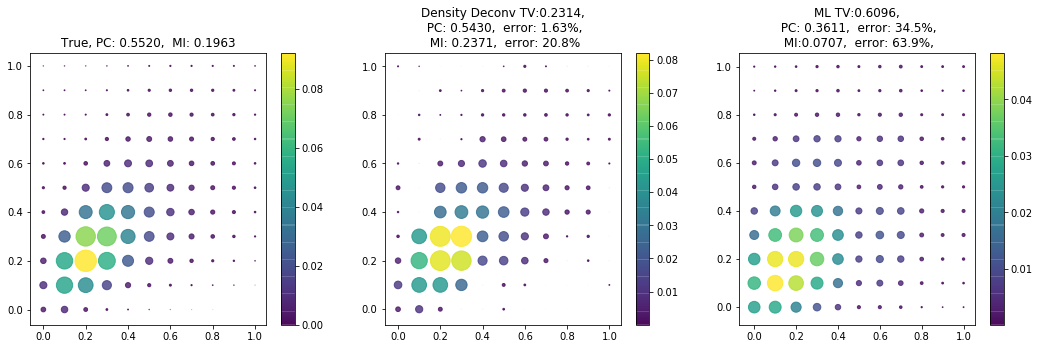

--------------------- lambda: 0.3 ---------------------
------ dd_2d start, option:dd, lambda:0.3
------ model cal completed: 0.0596859455109
------ optimization start: 0.520039081573
------ optimization end: 3.4779920578
KL:-0.005, TV:0.0245, continuity: 0.0045
------ dd_2d end: 3.48435997963


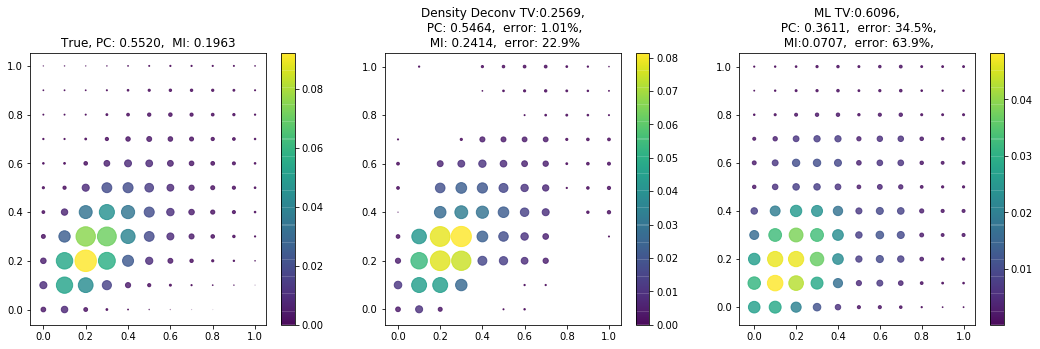

------ dd_2d start, option:mml, lambda:0.3
------ model cal completed: 0.0595049858093
------ optimization start: 0.524792909622
------ optimization end: 8.57013988495
KL:-0.005, TV:0.0259, continuity: 0.0039
------ dd_2d end: 8.57722091675


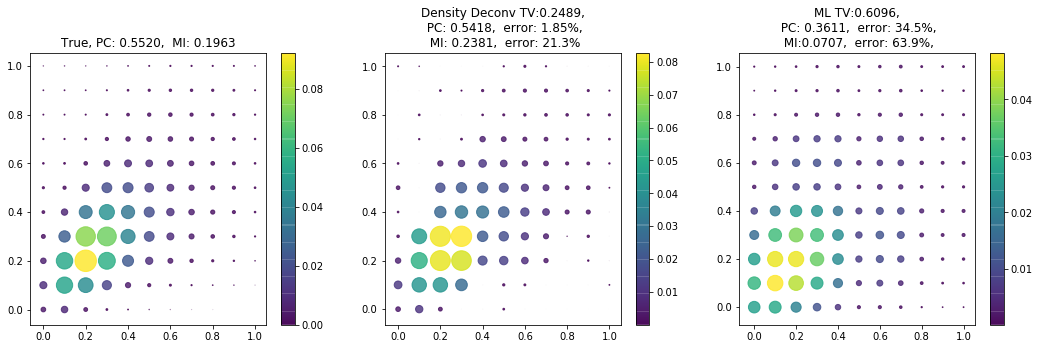

--------------------- lambda: 0.4 ---------------------
------ dd_2d start, option:dd, lambda:0.4
------ model cal completed: 0.0618698596954
------ optimization start: 0.517149925232
------ optimization end: 4.68411397934
KL:-0.005, TV:0.0253, continuity: 0.0041
------ dd_2d end: 4.69394898415


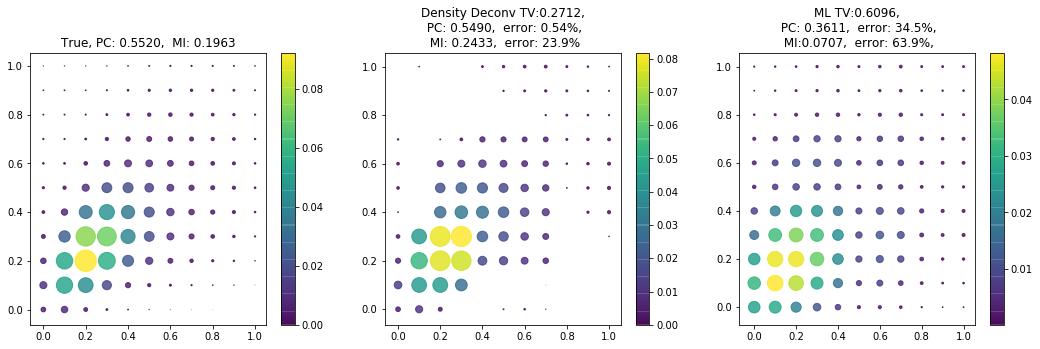

------ dd_2d start, option:mml, lambda:0.4
------ model cal completed: 0.0656630992889
------ optimization start: 0.519110918045
------ optimization end: 7.74331092834
KL:-0.005, TV:0.0269, continuity: 0.0035
------ dd_2d end: 7.75436997414


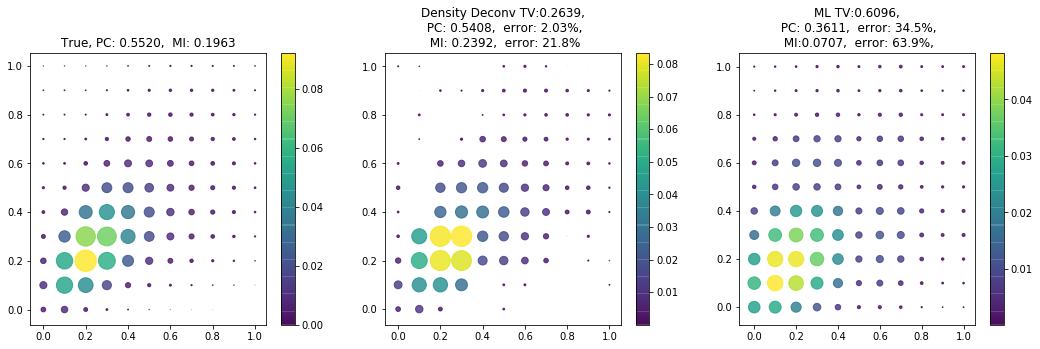

--------------------- lambda: 0.5 ---------------------
------ dd_2d start, option:dd, lambda:0.5
------ model cal completed: 0.0606560707092
------ optimization start: 0.520363092422
------ optimization end: 3.74830794334
KL:-0.005, TV:0.0259, continuity: 0.0039
------ dd_2d end: 3.75448203087


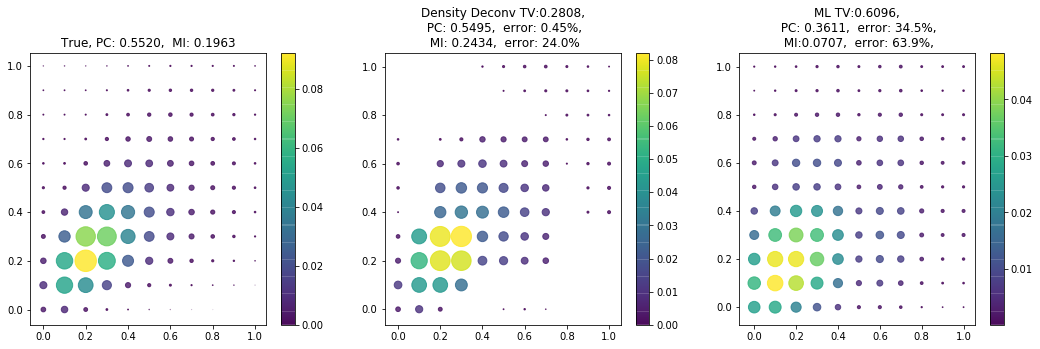

------ dd_2d start, option:mml, lambda:0.5
------ model cal completed: 0.0637950897217
------ optimization start: 0.518770933151
------ optimization end: 7.83696007729
KL:-0.005, TV:0.0278, continuity: 0.0032
------ dd_2d end: 7.84194397926


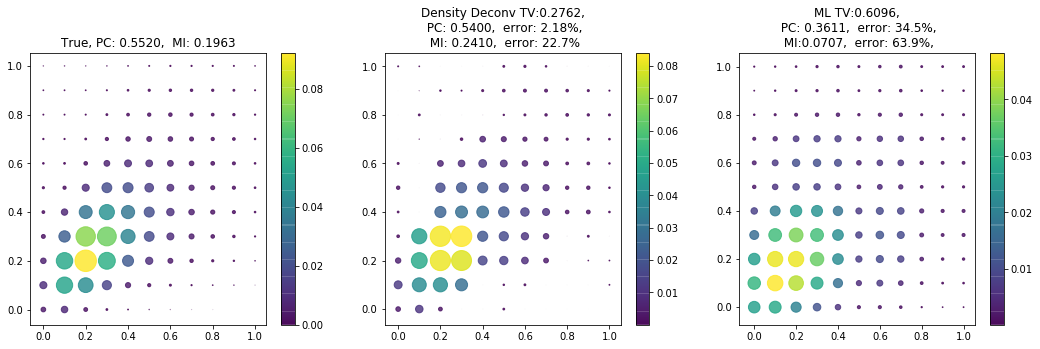

--------------------- lambda: 0.6 ---------------------
------ dd_2d start, option:dd, lambda:0.6
------ model cal completed: 0.0590839385986
------ optimization start: 0.542253017426
------ optimization end: 3.67999505997
KL:-0.005, TV:0.0264, continuity: 0.0038
------ dd_2d end: 3.68622398376


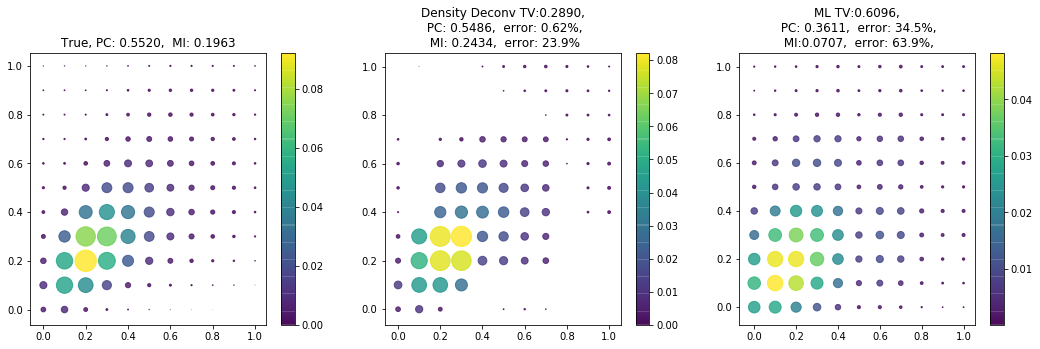

------ dd_2d start, option:mml, lambda:0.6
------ model cal completed: 0.0590419769287
------ optimization start: 0.513258934021
------ optimization end: 6.06211400032
KL:-0.005, TV:0.0286, continuity: 0.0030
------ dd_2d end: 6.06792497635


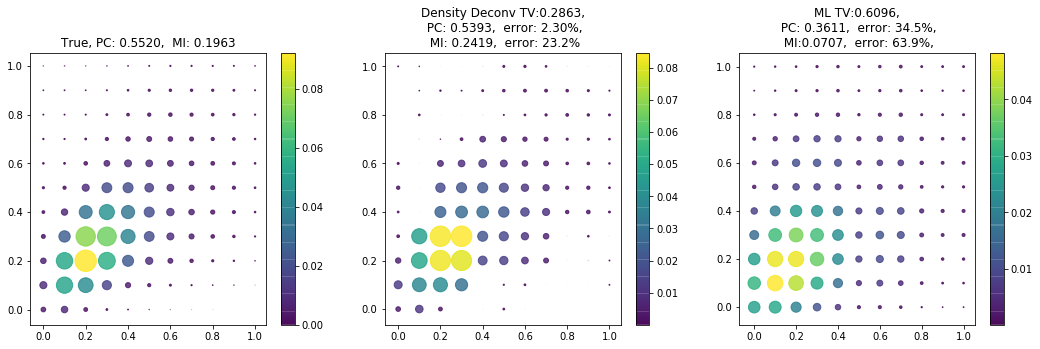

--------------------- lambda: 0.7 ---------------------
------ dd_2d start, option:dd, lambda:0.7
------ model cal completed: 0.0610721111298
------ optimization start: 0.529417991638
------ optimization end: 3.59033799171
KL:-0.006, TV:0.0269, continuity: 0.0037
------ dd_2d end: 3.59606695175


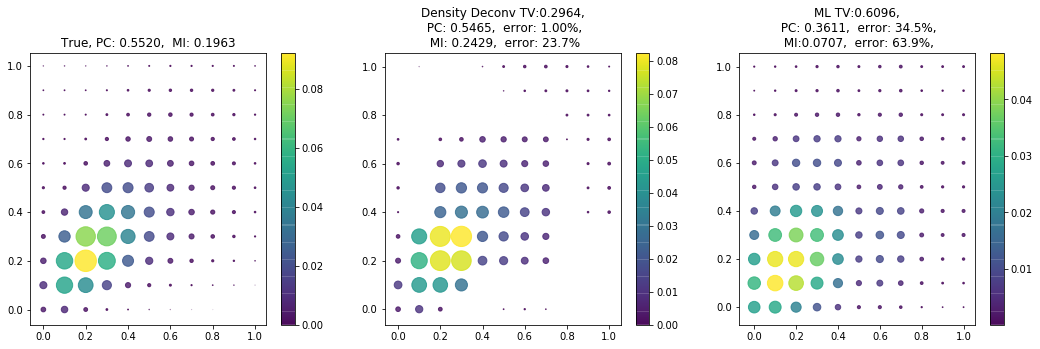

------ dd_2d start, option:mml, lambda:0.7
------ model cal completed: 0.0676188468933
------ optimization start: 0.525131940842
------ optimization end: 8.28417801857
KL:-0.005, TV:0.0294, continuity: 0.0028
------ dd_2d end: 8.29118800163


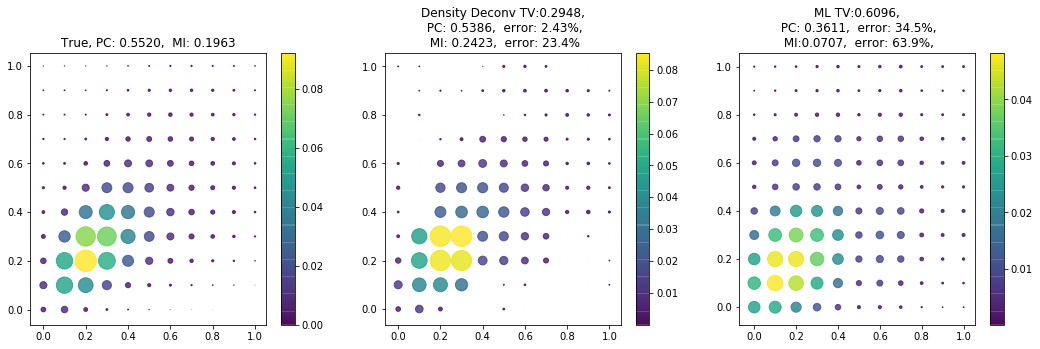

--------------------- lambda: 0.8 ---------------------
------ dd_2d start, option:dd, lambda:0.8
------ model cal completed: 0.0586459636688
------ optimization start: 0.52275800705
------ optimization end: 3.5875480175
KL:-0.006, TV:0.0274, continuity: 0.0036
------ dd_2d end: 3.5940310955


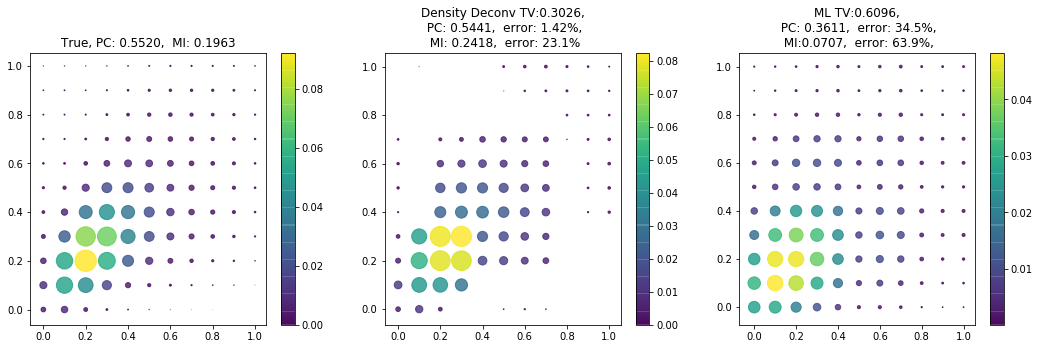

------ dd_2d start, option:mml, lambda:0.8
------ model cal completed: 0.0656399726868
------ optimization start: 0.538078069687
------ optimization end: 8.41208219528
KL:-0.005, TV:0.0302, continuity: 0.0026
------ dd_2d end: 8.42261910439


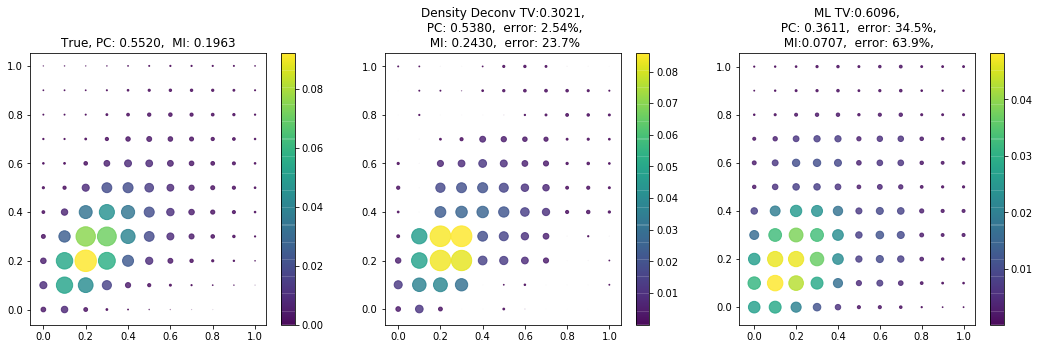

--------------------- lambda: 0.9 ---------------------
------ dd_2d start, option:dd, lambda:0.9
------ model cal completed: 0.0663080215454
------ optimization start: 0.519444942474
------ optimization end: 3.41148090363
KL:-0.006, TV:0.0278, continuity: 0.0035
------ dd_2d end: 3.41713500023


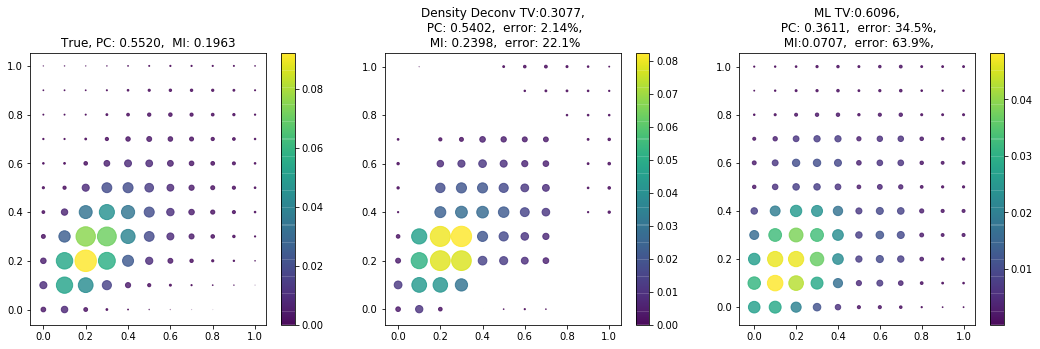

------ dd_2d start, option:mml, lambda:0.9
------ model cal completed: 0.0585768222809
------ optimization start: 0.519068956375
------ optimization end: 8.25255489349
KL:-0.005, TV:0.0309, continuity: 0.0025
------ dd_2d end: 8.26357603073


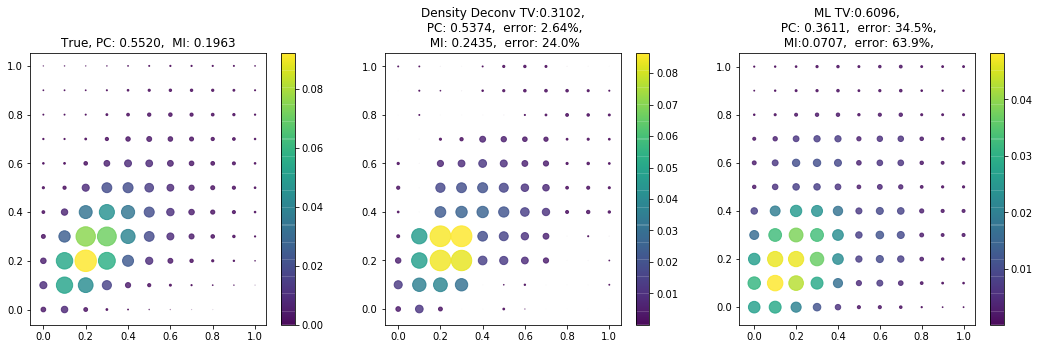

--------------------- lambda: 1.0 ---------------------
------ dd_2d start, option:dd, lambda:1.0
------ model cal completed: 0.061007976532
------ optimization start: 0.527995109558
------ optimization end: 3.70428800583
KL:-0.006, TV:0.0282, continuity: 0.0035
------ dd_2d end: 3.7154109478


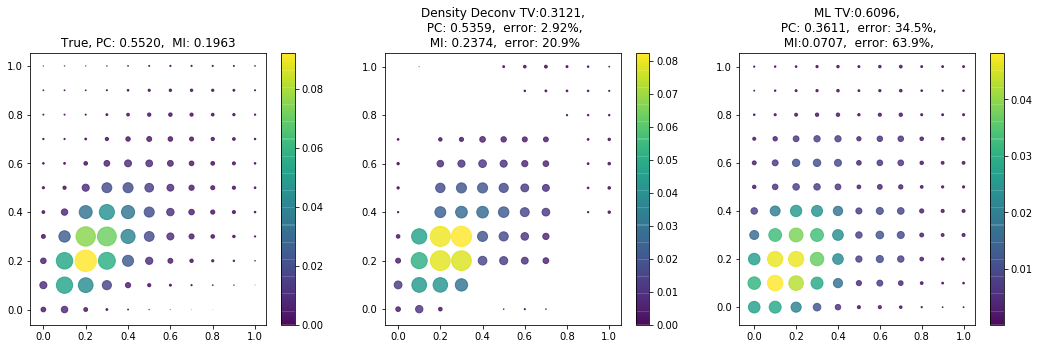

------ dd_2d start, option:mml, lambda:1.0
------ model cal completed: 0.0624330043793
------ optimization start: 0.526551961899
------ optimization end: 8.02861094475
KL:-0.006, TV:0.0316, continuity: 0.0024
------ dd_2d end: 8.03815102577


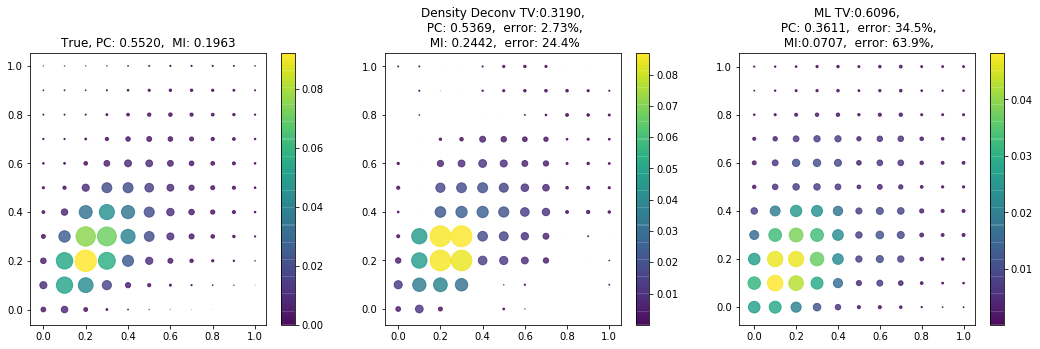

In [59]:
for lamb in np.linspace(0.0,1,11):
    print '--------------------- lambda: %s ---------------------'%str(lamb)
    p_hat, dd_info=dd_2d(Y_pdf,Y_supp,x,N_c,N_r,option='dd',lamb=lamb)
    _=plot_dd_result(p,p_hat,dd_info)

    p_hat, dd_info=dd_2d(Y_pdf,Y_supp,x,N_c,N_r,option='mml',lamb=lamb)
    _=plot_dd_result(p,p_hat,dd_info)

In [ ]:
Nr_list=[5,10,20]
# Nr_list=[5]
Nc_list=[int(5e3),int(1e4),int(5e4),int(1e5),int(5e5)]
# Nc_list=[int(5e3),int(1e4)]
opt_list=['mml','dd','debug']
lamb=0.1
rep_time=5
output_folder='./methods_comparison_10x'
error_type_list=['err_tv_dd','err_tv_ml','err_pc_dd','err_pc_ml','err_mi_dd','err_mi_ml']

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

for N_r in Nr_list:
    #dim of res: (rep_time, N_c, option, error type: tv_dd,pc_dd,mi_dd,tv_ml,pc_ml,mi_ml)
    rec=np.zeros([rep_time,len(Nc_list),3,6],dtype=float) 
    for i_Nc in range(len(Nc_list)):
        for i_opt in range(len(opt_list)):
            for i_rep in range(rep_time):
                res = exp_2d(p,x,(Nc_list[i_Nc],N_r,opt_list[i_opt],0.1,0))
                for i_etype in range(len(error_type_list)):
                    rec[i_rep,i_Nc,i_opt,i_etype]=res[error_type_list[i_etype]]
    # generating the plot 
    plt.figure(figsize=[18,5])
    
    plt.subplot(131)
    plt.title('tv, N_r=%s'%str(N_r))
    plt.plot(np.log(Nc_list),np.mean(rec[:,:,0,1],axis=0),marker='o',label='ml'+': tv')
    for i_opt in range(len(opt_list)):
        plt.plot(np.log(Nc_list),np.mean(rec[:,:,i_opt,0],axis=0),marker='o',label=opt_list[i_opt]+': tv') 
    plt.ylabel('error')
    plt.xlabel('log N_c')
    plt.legend()
    
    plt.subplot(132)
    plt.title('pc, N_r=%s'%str(N_r))
    plt.plot(np.log(Nc_list),np.mean(rec[:,:,0,3],axis=0),marker='o',label='ml'+': pc')
    for i_opt in range(len(opt_list)):
        plt.plot(np.log(Nc_list),np.mean(rec[:,:,i_opt,2],axis=0),marker='o',label=opt_list[i_opt]+': pc')
    plt.ylabel('percentage of error')
    plt.xlabel('log N_c')
    plt.legend()

    plt.subplot(133)
    plt.title('mi, N_r=%s'%str(N_r))
    plt.plot(np.log(Nc_list),np.mean(rec[:,:,0,5],axis=0),marker='o',label='ml'+': pc')
    for i_opt in range(len(opt_list)):
        plt.plot(np.log(Nc_list),np.mean(rec[:,:,i_opt,4],axis=0),marker='o',label=opt_list[i_opt]+': mi')
    plt.ylabel('percentage of error')
    plt.xlabel('log N_c')
    plt.legend()
    plt.savefig(output_folder+'/N_r_'+str(N_r))
    plt.close()
    


------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.00885796546936
------ optimization start: 0.0855400562286
------ optimization end: 0.691433906555
KL:-0.008, TV:0.0288, continuity: 0.0013
------ dd_2d end: 0.693238973618
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.00719690322876
------ optimization start: 0.067862033844
------ optimization end: 0.55520606041
KL:-0.010, TV:0.0333, continuity: 0.0014
------ dd_2d end: 0.556761980057
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.00716090202332
------ optimization start: 0.0644500255585
------ optimization end: 0.483805894852
KL:-0.011, TV:0.0412, continuity: 0.0031
------ dd_2d end: 0.485592842102
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.00893902778625
------ optimization start: 0.0706150531769
------ optimization end: 0.478896141052
KL:-0.009, TV:0.0325, continuity: 0.0014
------ dd_2d end: 0.480720043182
------ dd_2d start, op

------ optimization end: 0.860224962234
KL:-0.001, TV:0.0085, continuity: 0.0005
------ dd_2d end: 0.863070964813
------ dd_2d start, option:dd, lambda:0.1
------ model cal completed: 0.0139458179474
------ optimization start: 0.123284816742
------ optimization end: 0.861432790756
KL:-0.001, TV:0.0069, continuity: 0.0038
------ dd_2d end: 0.862732887268
------ dd_2d start, option:dd, lambda:0.1
------ model cal completed: 0.0150580406189
------ optimization start: 0.131985902786
------ optimization end: 0.913519859314
KL:-0.002, TV:0.0084, continuity: 0.0039
------ dd_2d end: 0.916251897812
------ dd_2d start, option:dd, lambda:0.1
------ model cal completed: 0.0172629356384
------ optimization start: 0.10623216629
------ optimization end: 0.926671028137
KL:-0.001, TV:0.0080, continuity: 0.0010
------ dd_2d end: 0.929201126099
------ dd_2d start, option:dd, lambda:0.1
------ model cal completed: 0.0125169754028
------ optimization start: 0.108583927155
------ optimization end: 0.847841

------ optimization end: 0.916919946671
KL:-0.000, TV:0.0026, continuity: 0.0027
------ dd_2d end: 0.918823003769
------ dd_2d start, option:dd, lambda:0.1
------ model cal completed: 0.0133681297302
------ optimization start: 0.127017974854
------ optimization end: 0.837239027023
KL:-0.000, TV:0.0029, continuity: 0.0023
------ dd_2d end: 0.83919095993
------ dd_2d start, option:debug, lambda:0.1
------ model cal completed: 0.0164351463318
------ optimization start: 0.135466098785
------ optimization end: 2.90957808495
KL:-0.000, TV:0.0048, continuity: 0.0004
------ dd_2d end: 2.91344308853
------ dd_2d start, option:debug, lambda:0.1
------ model cal completed: 0.0126340389252
------ optimization start: 0.127923965454
------ optimization end: 1.65620613098
KL:-0.000, TV:0.0056, continuity: 0.0005
------ dd_2d end: 1.65841007233
------ dd_2d start, option:debug, lambda:0.1
------ model cal completed: 0.0137391090393
------ optimization start: 0.130419015884
------ optimization end: 2.1

------ optimization end: 2.48709797859
KL:-0.014, TV:0.0392, continuity: 0.0032
------ dd_2d end: 2.49055886269
------ dd_2d start, option:debug, lambda:0.1
------ model cal completed: 0.0173878669739
------ optimization start: 0.162084817886
------ optimization end: 3.5413749218
KL:-0.015, TV:0.0399, continuity: 0.0040
------ dd_2d end: 3.54457497597
------ dd_2d start, option:debug, lambda:0.1
------ model cal completed: 0.025808095932
------ optimization start: 0.17773103714
------ optimization end: 3.41459608078
KL:-0.012, TV:0.0387, continuity: 0.0021
------ dd_2d end: 3.41982913017
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0264730453491
------ optimization start: 0.218325138092
------ optimization end: 3.12293505669
KL:-0.003, TV:0.0185, continuity: 0.0027
------ dd_2d end: 3.12619900703
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0246748924255
------ optimization start: 0.215932846069
------ optimization end: 3.27211189

In [14]:
np.linspace(5,40,17,dtype=int)

array([ 5,  7,  9, 11, 13, 15, 18, 20, 22, 24, 26, 29, 31, 33, 35, 37, 40])

In [ ]:
np.random.seed(42)
param_list=[]
# for B in [1e3,2e3,5e3,1e4,2e4,5e4,1e5,2e5,5e5,1e6,2e6,5e6]:
for B in [2e4,5e4,1e5,2e5,5e5,1e6,2e6,5e6]:
    for N_r in np.linspace(5,40,17,dtype=int):
        N_c=np.max([int(B/(N_r+0.0)),1])
        param_list.append([N_c,N_r,int(B)])
param_list=np.array(param_list)
rep_time=10
res_dd,res_ml=simu_dd_2d(p,x,param_list,rep_time,output_folder)

N_c:4000, N_r:5, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.00591588020325
------ optimization start: 0.0529799461365
------ optimization end: 0.444670915604
KL:-0.014, TV:0.0303, continuity: 0.0009
------ dd_2d end: 0.44587802887
N_c:4000, N_r:5, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.00649213790894
------ optimization start: 0.0578060150146
------ optimization end: 0.453850030899
KL:-0.015, TV:0.0465, continuity: 0.0043
------ dd_2d end: 0.455826997757
N_c:4000, N_r:5, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.00533604621887
------ optimization start: 0.0498108863831
------ optimization end: 0.354161024094
KL:-0.013, TV:0.0367, continuity: 0.0019
------ dd_2d end: 0.355333089828
N_c:4000, N_r:5, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.00499677658081
------ optimization start:

------ optimization end: 1.01190400124
KL:-0.051, TV:0.0815, continuity: 0.0064
------ dd_2d end: 1.01386785507
N_c:1818, N_r:11, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0155742168427
------ optimization start: 0.105087041855
------ optimization end: 0.791239023209
KL:-0.069, TV:0.0960, continuity: 0.0039
------ dd_2d end: 0.793207168579
N_c:1818, N_r:11, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0137648582458
------ optimization start: 0.103173971176
------ optimization end: 0.55795788765
KL:-0.067, TV:0.0986, continuity: 0.0062
------ dd_2d end: 0.559807062149
N_c:1818, N_r:11, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0139529705048
------ optimization start: 0.116720914841
------ optimization end: 0.617420911789
KL:-0.055, TV:0.0928, continuity: 0.0072
------ dd_2d end: 0.619704961777
N_c:1818, N_r:11, option:mml, lamb:0.1
----

------ optimization end: 1.66828393936
KL:-0.120, TV:0.1395, continuity: 0.0118
------ dd_2d end: 1.67243695259
N_c:1111, N_r:18, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0289762020111
------ optimization start: 0.178722143173
------ optimization end: 2.85790300369
KL:-0.195, TV:0.1967, continuity: 0.0144
------ dd_2d end: 2.86143302917
N_c:1111, N_r:18, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0226929187775
------ optimization start: 0.159015893936
------ optimization end: 1.55202388763
KL:-0.184, TV:0.1942, continuity: 0.0113
------ dd_2d end: 1.55485081673
N_c:1111, N_r:18, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0342018604279
------ optimization start: 0.187824964523
------ optimization end: 5.50381088257
KL:-0.166, TV:0.1733, continuity: 0.0194
------ dd_2d end: 5.50651597977
N_c:1111, N_r:18, option:mml, lamb:0.1
------ dd

------ optimization start: 0.208933115005
------ optimization end: 3.93068814278
KL:-0.274, TV:0.2405, continuity: 0.0160
------ dd_2d end: 3.93385505676
N_c:833, N_r:24, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0515608787537
------ optimization start: 0.21873998642
------ optimization end: 6.71291399002
KL:-0.367, TV:0.2945, continuity: 0.0150
------ dd_2d end: 6.71633601189
N_c:833, N_r:24, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0526249408722
------ optimization start: 0.23792886734
------ optimization end: 6.3093419075
KL:-0.339, TV:0.2719, continuity: 0.0209
------ dd_2d end: 6.31429290771
N_c:833, N_r:24, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0485711097717
------ optimization start: 0.224767923355
------ optimization end: 7.00626707077
KL:-0.331, TV:0.2629, continuity: 0.0198
------ dd_2d end: 7.01014208794
N_c:833, N_r

------ optimization start: 0.260759115219
------ optimization end: 12.3480699062
KL:-0.519, TV:0.3503, continuity: 0.0230
------ dd_2d end: 12.353028059
N_c:645, N_r:31, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0793399810791
------ optimization start: 0.290306806564
------ optimization end: 13.8178048134
KL:-0.624, TV:0.3961, continuity: 0.0209
------ dd_2d end: 13.8220038414
N_c:645, N_r:31, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0467858314514
------ optimization start: 0.246570825577
------ optimization end: 2.9736328125
KL:-0.552, TV:0.3703, continuity: 0.0338
------ dd_2d end: 2.9769179821
N_c:645, N_r:31, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0710299015045
------ optimization start: 0.269201993942
------ optimization end: 7.58033800125
KL:-0.570, TV:0.3727, continuity: 0.0271
------ dd_2d end: 7.584015131
N_c:645, N_r:3

------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.12392115593
------ optimization start: 0.782883167267
------ optimization end: 22.1317191124
KL:-0.054, TV:0.0925, continuity: 0.0083
------ dd_2d end: 22.1398870945
N_c:15151, N_r:33, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.107043981552
------ optimization start: 0.740160942078
------ optimization end: 20.195595026
KL:-0.055, TV:0.0951, continuity: 0.0080
------ dd_2d end: 20.2048568726
N_c:15151, N_r:33, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0993990898132
------ optimization start: 0.732886075974
------ optimization end: 18.4771709442
KL:-0.051, TV:0.0883, continuity: 0.0079
------ dd_2d end: 18.4856688976
N_c:14285, N_r:35, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.128455162048
------ optimization start: 0.812227010727
------ optimization end: 25.07734

------ optimization end: 30.4891750813
KL:-0.083, TV:0.1197, continuity: 0.0085
------ dd_2d end: 30.498319149
N_c:12500, N_r:40, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.16499710083
------ optimization start: 0.94397521019
------ optimization end: 29.7845611572
KL:-0.080, TV:0.1174, continuity: 0.0094
------ dd_2d end: 29.7957100868
N_c:12500, N_r:40, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.156229019165
------ optimization start: 0.922184944153
------ optimization end: 35.8073449135
KL:-0.083, TV:0.1197, continuity: 0.0122
------ dd_2d end: 35.8171348572
N_c:12500, N_r:40, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.132579088211
------ optimization start: 0.892884016037
------ optimization end: 25.75761199
KL:-0.079, TV:0.1194, continuity: 0.0093
------ dd_2d end: 25.7725291252
N_c:200000, N_r:5, option:mml, lamb:0.1
------ dd_2d 

------ optimization start: 0.188220024109
------ optimization end: 2.21748495102
KL:-0.001, TV:0.0141, continuity: 0.0024
------ dd_2d end: 2.22027897835
N_c:111111, N_r:9, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0189950466156
------ optimization start: 0.185971021652
------ optimization end: 1.1061501503
KL:-0.001, TV:0.0126, continuity: 0.0020
------ dd_2d end: 1.1094789505
N_c:111111, N_r:9, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0171661376953
------ optimization start: 0.173666000366
------ optimization end: 1.01547718048
KL:-0.001, TV:0.0128, continuity: 0.0020
------ dd_2d end: 1.01822519302
N_c:111111, N_r:9, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0163447856903
------ optimization start: 0.182198762894
------ optimization end: 0.722502946854
KL:-0.001, TV:0.0127, continuity: 0.0024
------ dd_2d end: 0.725346803665
N_c

------ optimization start: 0.321452140808
------ optimization end: 4.83166599274
KL:-0.004, TV:0.0224, continuity: 0.0048
------ dd_2d end: 4.83652591705
N_c:66666, N_r:15, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0362639427185
------ optimization start: 0.332394838333
------ optimization end: 5.11730885506
KL:-0.004, TV:0.0232, continuity: 0.0051
------ dd_2d end: 5.12178492546
N_c:66666, N_r:15, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0343198776245
------ optimization start: 0.321050882339
------ optimization end: 4.01598501205
KL:-0.004, TV:0.0238, continuity: 0.0045
------ dd_2d end: 4.02302479744
N_c:66666, N_r:15, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0347921848297
------ optimization start: 0.31698513031
------ optimization end: 4.68579721451
KL:-0.004, TV:0.0232, continuity: 0.0044
------ dd_2d end: 4.69022107124
N_c:

------ optimization start: 0.499433040619
------ optimization end: 6.17567896843
KL:-0.010, TV:0.0379, continuity: 0.0063
------ dd_2d end: 6.18175196648
N_c:45454, N_r:22, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0660359859467
------ optimization start: 0.513539075851
------ optimization end: 10.1197640896
KL:-0.011, TV:0.0378, continuity: 0.0071
------ dd_2d end: 10.1274950504
N_c:45454, N_r:22, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0586850643158
------ optimization start: 0.504914045334
------ optimization end: 7.06995916367
KL:-0.010, TV:0.0365, continuity: 0.0062
------ dd_2d end: 7.07629323006
N_c:45454, N_r:22, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0619740486145
------ optimization start: 0.51127409935
------ optimization end: 9.84670615196
KL:-0.010, TV:0.0368, continuity: 0.0064
------ dd_2d end: 9.85541605949
N_c:

------ optimization end: 6.07095503807
KL:-0.001, TV:0.0153, continuity: 0.0055
------ dd_2d end: 6.07710289955
N_c:277777, N_r:18, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0519850254059
------ optimization start: 0.500535011292
------ optimization end: 4.79364395142
KL:-0.001, TV:0.0149, continuity: 0.0053
------ dd_2d end: 4.79942297935
N_c:250000, N_r:20, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.0672311782837
------ optimization start: 0.576852083206
------ optimization end: 24.8067471981
KL:-0.007, TV:0.0314, continuity: 0.0077
------ dd_2d end: 24.8187811375
N_c:142857, N_r:35, option:mml, lamb:0.1
------ dd_2d start, option:mml, lambda:0.1
------ model cal completed: 0.142985105515
------ optimization start: 1.17578220367
------ optimization end: 26.5230531693
KL:-0.007, TV:0.0315, continuity: 0.0082
------ dd_2d end: 26.535143137
N_c:135135, N_r:37, option:mml, lamb:0.1
----

In [18]:
for i in range(param_list.shape[0]):
    print param_list[i],res_dd[i],res_ml[i]

[ 20000      5 100000] [ 0.26971445] [ 0.75215788]
[ 10000     10 100000] [ 0.18162557] [ 0.35695037]
[100000      5 500000] [ 0.3103797] [ 0.75655788]
[ 50000     10 500000] [ 0.18816408] [ 0.35309611]
